# CQT tests

<a href="https://colab.research.google.com/github/inspektral/onset-benchmark/blob/main/cqt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

if 'google.colab' in str(get_ipython()):
    repo_name = 'onset-benchmark'
    repo_path = f'/content/{repo_name}'
    
    # Check if the current working directory is already the repo
    if os.getcwd() != repo_path:
        if not os.path.exists(repo_path):
            !git clone https://github.com/inspektral/onset-benchmark.git
        os.chdir(repo_path)  # Change to the repository directory
        !pip install -r requirements.txt  # Install dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import synth
from IPython.display import Audio, display
import librosa

import utils

In [3]:
import test_signals

tests = {}

for name, obj in vars(test_signals).items():
    if callable(obj):
        tests[name] = obj

print("Available tests:")
for i, name in enumerate(tests.keys()):
    print(f"{i}: {name}")


Available tests:
0: random_sines
1: saw_noise
2: sines_noise
3: filter_saw


In [11]:
SAMPLE_RATE = 44100
CURRENT_TEST = 0

Running test: random_sines


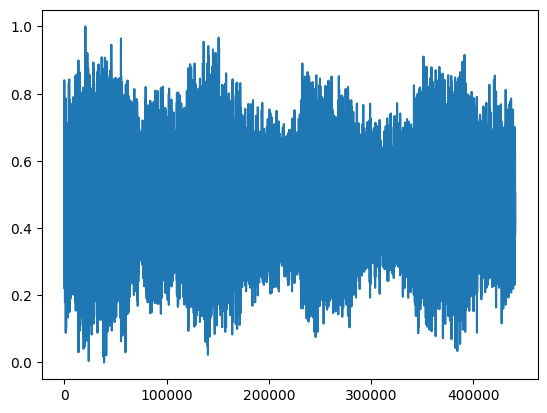

In [12]:
test = tests[list(tests.keys())[CURRENT_TEST]]
print(f"Running test: {test.__name__}")
audio = test()

plt.plot(audio)
plt.show()

display(Audio(audio, rate=SAMPLE_RATE))

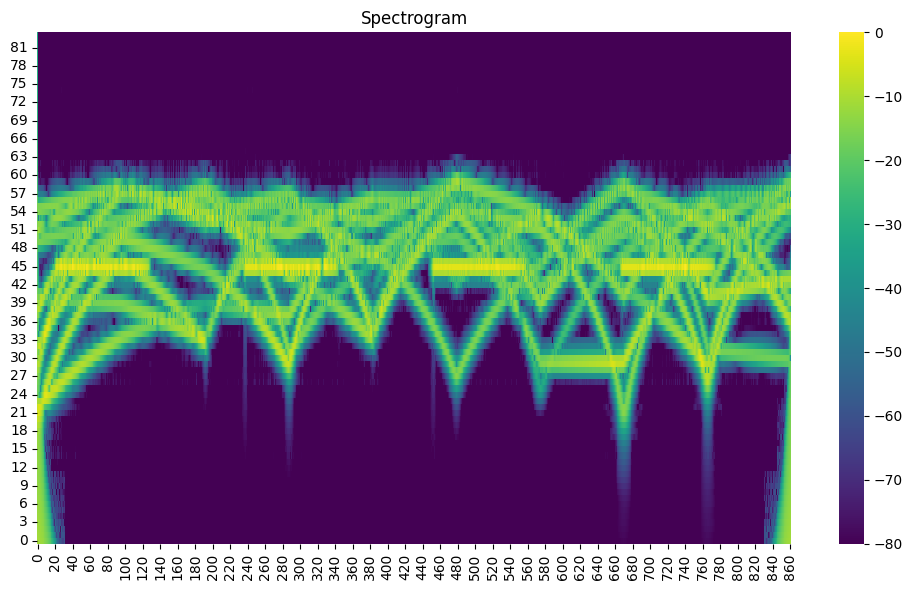

In [13]:
spectrum = librosa.amplitude_to_db(np.abs(librosa.cqt(audio, sr=SAMPLE_RATE)), ref=np.max)
utils.plot_heatmap(spectrum, title="Spectrogram")

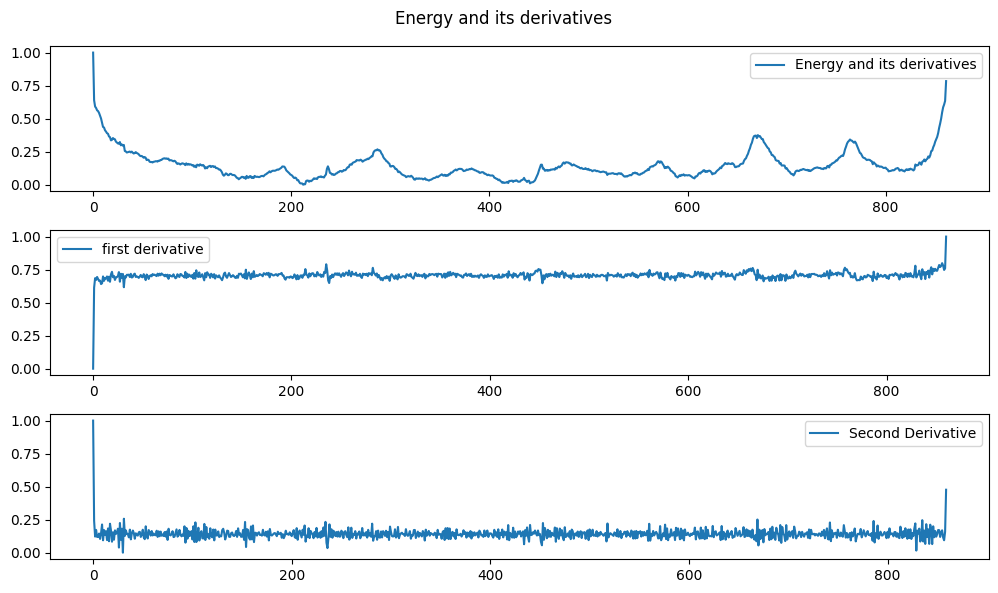

In [14]:
energy = np.sum(spectrum, axis=0)
d_energy = np.diff(energy)
dd_energy = np.diff(d_energy)

utils.plot_with_derivatives(
    energy,
    d_energy,
    dd_energy,
    title="Energy and its derivatives"
)

distances shape: (84, 861)


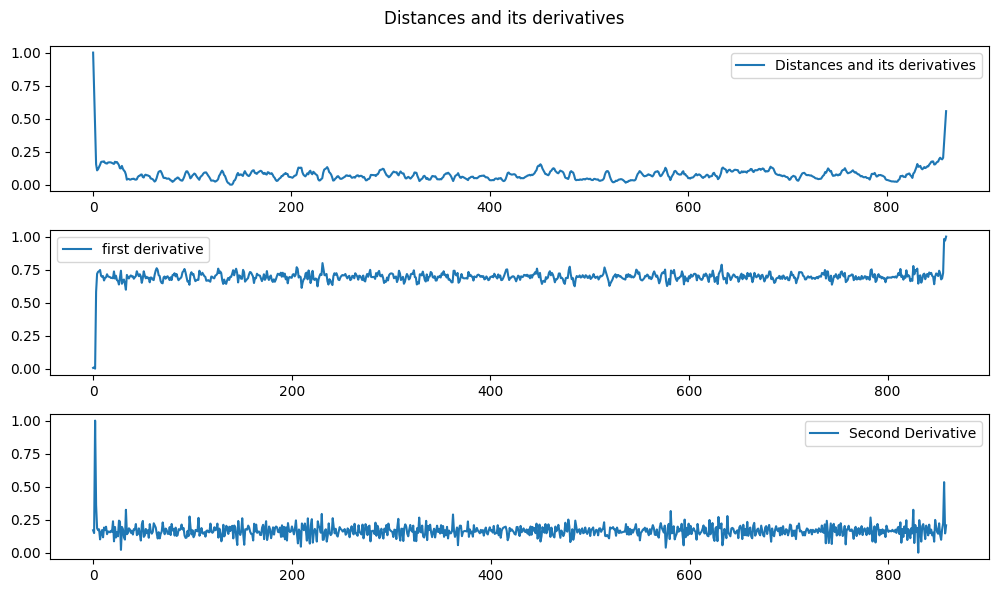

In [15]:
distances = utils.smoothing(utils.distances(spectrum))
d_distances = np.diff(distances)
dd_distances = np.diff(d_distances)

utils.plot_with_derivatives(
    distances,
    d_distances,
    dd_distances,
    title="Distances and its derivatives"
)

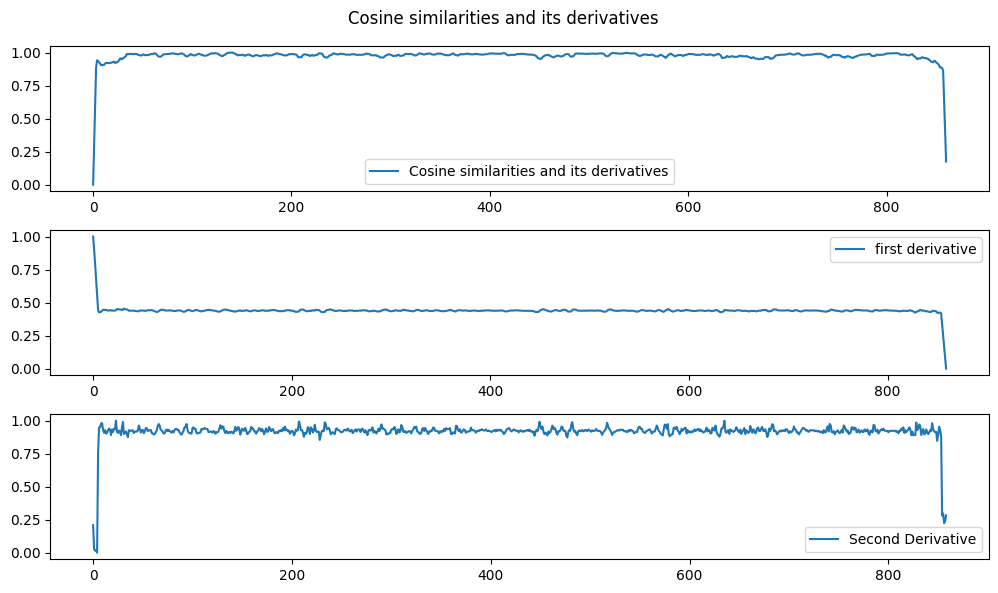

In [16]:
similarities = utils.smoothing(utils.cosine_similarity(spectrum))
d_similarities = utils.smoothing(np.diff(similarities))
dd_similarities = np.diff(d_similarities)

utils.plot_with_derivatives(
    similarities,
    d_similarities,
    dd_similarities,
    title="Cosine similarities and its derivatives"
)